#Data pre-processing

####Load libaries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

#### Load data set

In [18]:
test_data = pd.read_csv('/content/drive/MyDrive/GRAD-C24_Machine_Learning/ML_Lab_2/Constraint_Test.csv')

In [45]:
test_data_label = pd.read_csv('/content/drive/MyDrive/GRAD-C24_Machine_Learning/ML_Lab_2/english_test_with_labels.csv')

In [70]:
val_data = pd.read_csv('/content/drive/MyDrive/GRAD-C24_Machine_Learning/ML_Lab_2/Constraint_Val.csv')

In [20]:
train_data = pd.read_csv('/content/drive/MyDrive/GRAD-C24_Machine_Learning/ML_Lab_2/Constraint_Train.csv')

#### Data set exploration

##### Test data

In [33]:
test_data.head()

,id,tweet
0,1,Our daily update is published. States reported...
1,2,Alfalfa is the only cure for COVID-19.
2,3,President Trump Asked What He Would Do If He W...
3,4,States reported 630 deaths. We are still seein...
4,5,This is the sixth time a global health emergen...


In [43]:
test_data_label.head()

,id,tweet,label
0,1,Our daily update is published. States reported...,real
1,2,Alfalfa is the only cure for COVID-19.,fake
2,3,President Trump Asked What He Would Do If He W...,fake
3,4,States reported 630 deaths. We are still seein...,real
4,5,This is the sixth time a global health emergen...,real


In [40]:
test_data.count()

id       2140
tweet    2140
dtype: int64

In [67]:
test_data_label.iloc[1:, :]

,id,tweet,label
1,2,Alfalfa is the only cure for COVID-19.,fake
2,3,President Trump Asked What He Would Do If He W...,fake
3,4,States reported 630 deaths. We are still seein...,real
4,5,This is the sixth time a global health emergen...,real
5,6,Low #vitaminD was an independent predictor of ...,real
...,...,...,...
2135,2136,#CoronaVirusUpdates: State-wise details of Tot...,real
2136,2137,Tonight 12(midnight) onwards Disaster Manageme...,fake
2137,2138,296 new cases of #COVID19Nigeria; Plateau-85 E...,real
2138,2139,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...,real


In [69]:
test_data_label.iloc[:, :-1].compare(test_data)

Empty DataFrame
Columns: []
Index: []

In [20]:
test_data_label.groupby('label')['tweet'].count()

label
fake    1020
real    1120
Name: tweet, dtype: int64

##### Train data

In [21]:
train_data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [73]:
train_data.count()

id       6420
tweet    6420
label    6420
dtype: int64

In [74]:
train_data.groupby('label')['tweet'].count()

label
fake    3060
real    3360
Name: tweet, dtype: int64

##### Validation data

In [76]:
val_data.head()

,id,tweet,label
0,1,Chinese converting to Islam after realising th...,fake
1,2,11 out of 13 people (from the Diamond Princess...,fake
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake
3,4,Mike Pence in RNC speech praises Donald Trump’...,fake
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,real


In [77]:
val_data.count()

id       2140
tweet    2140
label    2140
dtype: int64

In [78]:
val_data.groupby('label')['tweet'].count()

label
fake    1020
real    1120
Name: tweet, dtype: int64

#### Build corpus

##### Stop words

In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
stops = set(stopwords.words("english"))

In [13]:
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [33]:
train_data['tweet'].map(lambda x: cleantext(x))

0       cdc currently reports 99031 deaths general dis...
1       states reported 1121 deaths small rise last tu...
2       politically correct woman almost uses pandemic...
3       indiafightscorona 1524 covid testing laborator...
4       populous states generate large case counts loo...
                              ...                        
6415    tiger tested positive covid 19 please stay awa...
6416    autopsies prove covid 19 blood clot pneumonia ...
6417    post claims covid 19 vaccine already developed...
6418        aamir khan donate 250 cr pm relief cares fund
6419    93 days since last case covid 19 acquired loca...
Name: tweet, Length: 6420, dtype: object

In [31]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stops:
            final_text.append(i.strip())
    return " ".join(final_text)

In [32]:
train_data['tweet'].apply(remove_stopwords)


0       CDC currently reports 99031 deaths. general di...
1       States reported 1121 deaths small rise last Tu...
2       Politically Correct Woman (Almost) Uses Pandem...
3       #IndiaFightsCorona: 1524 #COVID testing labora...
4       Populous states generate large case counts loo...
                              ...                        
6415    tiger tested positive COVID-19 please stay awa...
6416    ???Autopsies prove COVID-19 is??� blood clot, ...
6417    _A post claims COVID-19 vaccine already develo...
6418       Aamir Khan Donate 250 Cr. PM Relief Cares Fund
6419    93 days since last case COVID-19 acquired loca...
Name: tweet, Length: 6420, dtype: object

#### Word Cloud

In [34]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

<function matplotlib.pyplot.show>

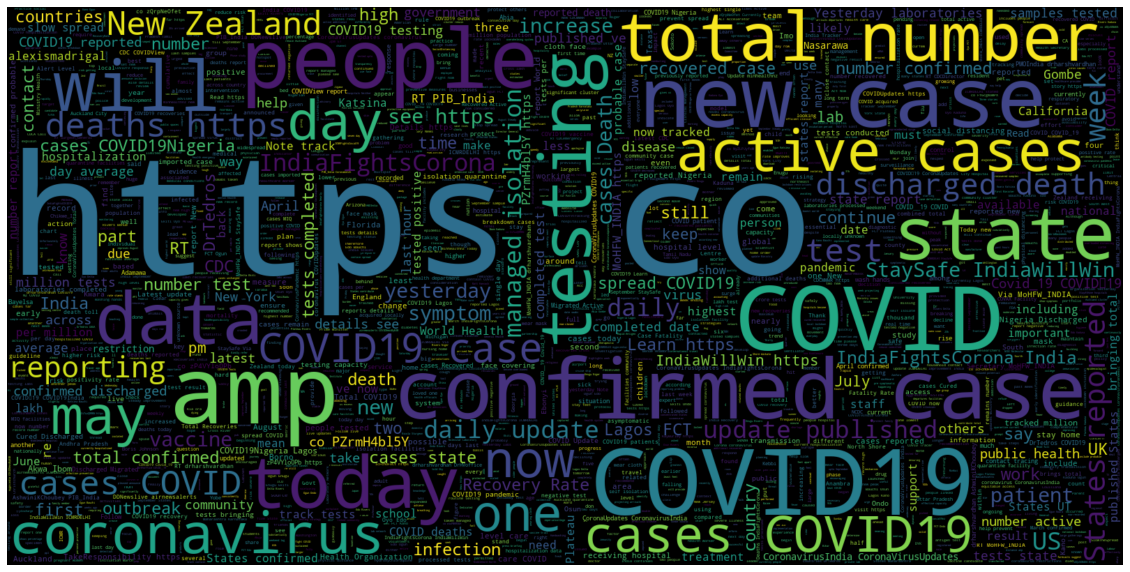

In [37]:
plt.figure(figsize = (20,20)) # Text from the real news articles
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(train_data[train_data.label == "real"].tweet))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show>

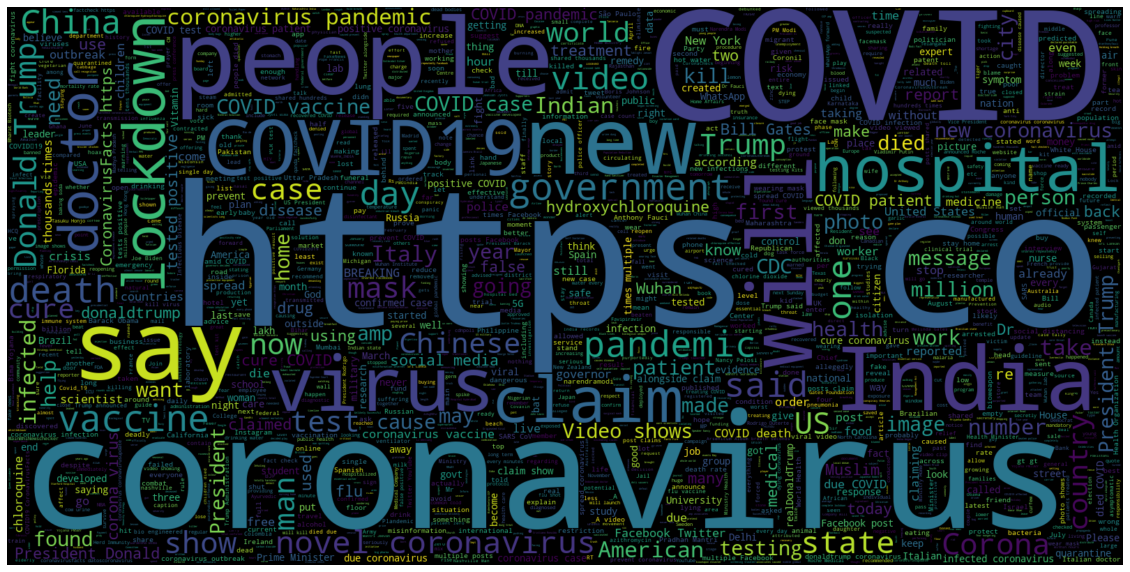

In [38]:
plt.figure(figsize = (20,20)) # Text from the real news articles
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(train_data[train_data.label == "fake"].tweet))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show